In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import seaborn as sns
warnings.filterwarnings("ignore")

In [110]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [111]:
train_df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [112]:

def impute_nan(train_df, variable):
    random_sample=train_df[variable].dropna().sample(train_df[variable].isnull().sum(), random_state=0)
    random_sample.index=train_df[train_df[variable].isnull()].index
    train_df.loc[train_df[variable].isnull(), variable]=random_sample

In [113]:
impute_nan(train_df, 'maincateg')
impute_nan(test_df, 'maincateg')

In [114]:
train_df.isnull().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [115]:
def impute_nan2(df, variable):
    # df[variable+'_nan']=np.where(df[variable].isnull(),1,0)
    impute_nan(df, variable)

In [116]:
cols=['norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f','star_2f', 'star_1f', 'Rating']
for x in cols:
    impute_nan2(train_df, x)
    impute_nan2(test_df, x)

In [117]:
test_df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [118]:
train_df.drop(columns = ['Offer %'], inplace =True)

In [119]:
continous_features = ['Rating', 'price1','actprice1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f'] # Fill the continuous fearures inside the array
categorical_features = ['id', 'title', 'maincateg', 'platform', 'fulfilled1'] # Fill the categorical features inside the array

In [120]:
for x in categorical_features:
  print(x,':',len(train_df[x].unique()))
  print(x,':',len(test_df[x].unique()))

id : 15730
id : 5244
title : 4782
title : 2383
maincateg : 2
maincateg : 2
platform : 2
platform : 2
fulfilled1 : 2
fulfilled1 : 2


In [121]:
id_train = pd.Series(train_df['id'])
id_test = pd.Series(test_df['id'])

In [122]:
train_df.drop('id', axis = 1, inplace = True)
train_df.drop('title', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)
test_df.drop('title', axis = 1, inplace = True)

print("Training data set shape: ", train_df.shape)
print("Testing data set shape: ", test_df.shape)

Training data set shape:  (15730, 13)
Testing data set shape:  (5244, 12)


In [123]:
train_df=pd.get_dummies(train_df, columns=['maincateg', 'platform'])
train_df.shape
test_df=pd.get_dummies(test_df, columns=['maincateg', 'platform'])
test_df.shape

(5244, 14)

In [124]:
train_df.head()

,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0,0,1,0,1
1,3.8,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,1,0,0,1
2,4.4,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,0,1,0,1
3,4.2,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,1,0,0,1
4,3.9,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,1,0,0,1


<AxesSubplot:xlabel='noreviews1', ylabel='Density'>

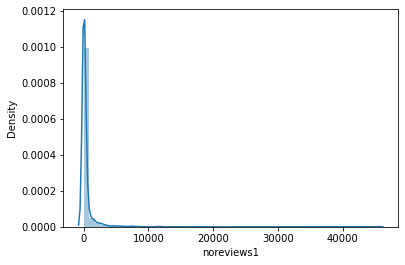

In [125]:
sns.distplot((train_df['noreviews1']))
#train_df['norating1']=np.log(train_df['norating1'])

In [126]:
col=['norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f']
for x in col:
    train_df[x]=(train_df[x])**(1/2)
    test_df[x]=(test_df[x])**(1/2)
train_df['price1']=train_df['price1']**(1/2)

In [127]:
col=['norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f']
for x in col:
    print(x+":",train_df[x].min())

norating1: 1.0
noreviews1: 0.0
star_5f: 0.0
star_4f: 0.0
star_3f: 0.0
star_2f: 0.0
star_1f: 0.0


In [128]:
X = train_df.drop('price1', axis = 1)
y = train_df['price1']
X_test = test_df

In [129]:
X_test

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,167.116726,59.523105,119.323091,65.536250,58.796258,44.294469,63.055531,1,1,0,0,1
1,3.9,499,54.909016,20.099751,38.183766,25.632011,19.924859,13.490738,17.916473,1,0,1,0,1
2,3.9,999,21.189620,7.211103,15.132746,8.366600,8.426150,5.744563,6.782330,1,0,1,0,1
3,3.9,2999,17.029386,6.324555,11.874342,7.141428,7.000000,4.123106,5.656854,1,1,0,0,1
4,3.9,999,49.223978,18.055470,35.566838,20.346990,17.117243,11.958261,17.549929,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,4.2,699,35.142567,12.369317,10.723805,17.972201,12.449900,7.874008,9.165151,1,0,1,0,1
5240,3.9,1993,18.138357,7.483315,18.708287,6.082763,7.745967,2.236068,6.082763,0,1,0,0,1
5241,3.8,999,35.777088,11.618950,23.958297,17.029386,13.114877,9.695360,12.247449,0,0,1,0,1
5242,3.9,499,69.763888,23.958297,48.826222,31.208973,25.455844,18.110770,23.086793,0,0,1,0,1


In [130]:
test_df.head()

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,167.116726,59.523105,119.323091,65.536250,58.796258,44.294469,63.055531,1,1,0,0,1
1,3.9,499,54.909016,20.099751,38.183766,25.632011,19.924859,13.490738,17.916473,1,0,1,0,1
2,3.9,999,21.189620,7.211103,15.132746,8.366600,8.426150,5.744563,6.782330,1,0,1,0,1
3,3.9,2999,17.029386,6.324555,11.874342,7.141428,7.000000,4.123106,5.656854,1,1,0,0,1
4,3.9,999,49.223978,18.055470,35.566838,20.346990,17.117243,11.958261,17.549929,0,1,0,0,1


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = ['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f','fulfilled1']
features = X[col_names]
X[col_names] = scaler.fit_transform(features.values)

features = X_test[col_names]
X_test[col_names] = scaler.fit_transform(features.values)







In [105]:
X_test.shape

(5244, 14)

In [77]:
from sklearn.model_selection import train_test_split
#X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
330/330 [==============================] - 2s 3ms/step - loss: 256019.7188 - mean_squared_error: 256019.7188
Epoch 2/100
330/330 [==============================] - 1s 3ms/step - loss: 81167.5391 - mean_squared_error: 81167.5391
Epoch 3/100
330/330 [==============================] - 1s 3ms/step - loss: 79769.9297 - mean_squared_error: 79769.9297
Epoch 4/100
330/330 [==============================] - 1s 3ms/step - loss: 78656.3594 - mean_squared_error: 78656.3594
Epoch 5/100
330/330 [==============================] - 1s 3ms/step - loss: 78892.0156 - mean_squared_error: 78892.0156
Epoch 6/100
330/330 [==============================] - 1s 3ms/step - loss: 78742.5078 - mean_squared_error: 78742.5078
Epoch 7/100
330/330 [==============================] - 1s 3ms/step - loss: 78191.9219 - mean_squared_error: 78191.9219
Epoch 8/100
330/330 [==============================] - 1s 3ms/step - loss: 77406.5000 - mean_squared_error: 77406.5000
Epoch 9/100
330/330 [=========================

330/330 [==============================] - 1s 3ms/step - loss: 65686.3828 - mean_squared_error: 65686.3828
Epoch 70/100
330/330 [==============================] - 1s 3ms/step - loss: 65568.8438 - mean_squared_error: 65568.8438
Epoch 71/100
330/330 [==============================] - 1s 3ms/step - loss: 65138.9453 - mean_squared_error: 65138.9453
Epoch 72/100
330/330 [==============================] - 1s 3ms/step - loss: 65179.2891 - mean_squared_error: 65179.2891
Epoch 73/100
330/330 [==============================] - 1s 3ms/step - loss: 65468.7383 - mean_squared_error: 65468.7383
Epoch 74/100
330/330 [==============================] - 1s 3ms/step - loss: 64994.4766 - mean_squared_error: 64994.4766
Epoch 75/100
330/330 [==============================] - 1s 3ms/step - loss: 64649.8672 - mean_squared_error: 64649.8672
Epoch 76/100
330/330 [==============================] - 1s 3ms/step - loss: 64999.4297 - mean_squared_error: 64999.4297
Epoch 77/100
330/330 [==============================]

In [27]:
import sklearn
preds1 = (model.predict(X_tes))**2
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_tes**2, preds1)))

163/163 [==============================] - 1s 3ms/step
Test RMSE:  1225957.6582621764


In [28]:
preds1 = model.predict(X_test)
id_test.to_numpy()

preds1[:,0].shape

164/164 [==============================] - 1s 3ms/step


(5244,)

In [29]:
preds1

array([[435.96234],
       [302.25082],
       [455.65173],
       ...,
       [408.8594 ],
       [252.02719],
       [785.4235 ]], dtype=float32)

In [30]:
np.array([[1,2,3]]).shape

(1, 3)

In [31]:

data = np.array([id_test, preds1[:,0]]).T

pd.DataFrame(data=data, columns = ['id','price1']).to_csv('submission1807.csv')
data

array([[ 2242.        ,   435.96234131],
       [20532.        ,   302.25082397],
       [10648.        ,   455.6517334 ],
       ...,
       [18733.        ,   408.85940552],
       [ 6162.        ,   252.02719116],
       [13574.        ,   785.42352295]])

In [32]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=42, max_iter=1500).fit(X_train, y_train)
preds = regr.predict(X_cv)


NameError: name 'X_cv' is not defined

In [ ]:
import sklearn
from numpy import sqrt
print("Cross Validation error: ", sqrt(sklearn.metrics.mean_squared_error(y_cv, preds)))

In [ ]:
preds = regr.predict(X_train)
print("Training error: ", sqrt(sklearn.metrics.mean_squared_error(y_train, preds)))

In [ ]:
preds = regr.predict(X_tes)
print("Test error: ", sqrt(sklearn.metrics.mean_squared_error(y_tes, preds)))

In [ ]:
X_test.shape

In [ ]:
predsf=regr.predict(X_test)

data = np.array([id_test, predsf]).T

pd.DataFrame(data=data, columns = ['id','price1']).to_csv('submissionoutput1807_5.csv')

In [ ]:
predsf.shape

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgbr = xg.XGBRegressor(objective ='reg:linear',n_estimators = 250, seed = 123).fit(X_train,y_train)
preds=xgbr.predict(X_cv)
print("RSME for CV: ",np.sqrt(MSE(y_cv, preds)))
preds2=xgbr.predict(X_tes)
print("RSME for Test: ",np.sqrt(MSE(y_tes, preds2)))
#print("Cross Validation error: ", sqrt(sklearn.metrics.mean_squared_error(y_cv, preds)))
preds=xgbr.predict(X_train)
print("RSME for Training: ",np.sqrt(MSE(y_train, preds)))

In [ ]:
predsf=(preds1[:,0]+preds2)/2
print("RSME for Test: ",np.sqrt(MSE(y_tes, predsf)))
print(predsf.shape)
print(y_tes.shape)

In [ ]:
predsf=xgbr.predict(X_test)

data = np.array([id_test, predsf]).T

pd.DataFrame(data=data, columns = ['id','price1']).to_csv('submissionoutput1507_5.csv')

In [ ]:
data

In [ ]:
preds1

In [ ]:
preds = model.predict(X_test)
id_test.to_numpy()
data = np.array([id_test, preds[:,0]]).T
pd.DataFrame(data=data, columns = ['id','price1']).to_csv('submissionoutput1507_3.csv')

In [132]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=18, n_estimators=4, random_state=0)
rfr.fit(X_train, y_train)
#predsrfr = rfr.predict(X_tes)**2
#print("RMSE for test dataset: ", np.sqrt(sklearn.metrics.mean_squared_error(y_tes**2, predsrfr)))

RandomForestRegressor(max_depth=18, n_estimators=4, random_state=0)

In [133]:
predsrfr_test = rfr.predict(X_test)**2
id_test.to_numpy()
data = np.array([id_test, predsrfr_test]).T
data

array([[ 2242.        ,   389.50296368],
       [20532.        ,   320.44156182],
       [10648.        ,   446.61073232],
       ...,
       [18733.        ,   420.70264293],
       [ 6162.        ,   182.40377773],
       [13574.        ,   692.26722819]])

In [134]:
pd.DataFrame(data=data, columns = ['id','price1']).to_csv('20072022_1.csv')